#### Выводим  данные из ЛАС-файлов

In [ ]:
!pip install lasio[all]

In [ ]:
import lasio
las171R=lasio.read('/content/LAS/036_171R.las')
las172R=lasio.read('/content/LAS/036_172R.las')
las178R=lasio.read('/content/LAS/036_178R.las')
las185R=lasio.read('/content/LAS/036_185R.las')
las230PO=lasio.read('/content/LAS/036_230PO.las')
las246PO=lasio.read('/content/LAS/036_246PO.las')
las250PO=lasio.read('/content/LAS/036_250PO.las')
las262PO=lasio.read('/content/LAS/036_262PO.las')

In [ ]:
df171R = las171R.df()
df171R['Well']='171R'
df_sel171R = df171R[['GR1','SP','DTP','ZONES_FIN','Well']]
df_total171R=df_sel171R[3129:3235]
df_total171R.to_csv('/content/CSV/171R.csv')

df172R = las172R.df()
df172R['Well']='172R'
df_sel172R = df172R[['GR1','SP','DTP','ZONES_FIN','Well']]
df_total172R=df_sel172R[3203:3286]
df_total172R.to_csv('/content/CSV/172R.csv')

df178R = las178R.df()
df178R['Well']='178R'
df_sel178R = df178R[['GR1','SP','DTP','ZONES_FIN','Well']]
df_total178R=df_sel178R[3174:3228]
df_total178R.to_csv('/content/CSV/178R.csv')

df185R = las185R.df()
df185R['Well']='185R'
df_sel185R = df185R[['GR1','SP','DTP','ZONES_FIN','Well']]
df_total185R=df_sel185R[3130:3268]
df_total185R.to_csv('/content/CSV/185R.csv')

df230PO = las230PO.df()
df230PO['Well']='230PO'
df_sel230PO = df230PO[['GR1','SP','DTP','ZONES_FIN','Well']]
df_total230PO=df_sel230PO[3139:3278]
df_total230PO.to_csv('/content/CSV/230PO.csv')

df246PO = las246PO.df()
df246PO['Well']='246PO'
df_sel246PO = df246PO[['GR1','SP','DTP','ZONES_FIN','Well']]
df_total246PO=df_sel246PO[3184:3328]
df_total246PO.to_csv('/content/CSV/246PO.csv')

df250PO = las250PO.df()
df250PO['Well']='250PO'
df_sel250PO = df250PO[['GR1','SP','DTP','ZONES_FIN','Well']]
df_total250PO=df_sel250PO[3492:3608]
df_total250PO.to_csv('/content/CSV/250PO.csv')

df262PO = las262PO.df()
df262PO ['Well']='262PO'
df_sel262PO = df262PO[['GR1','SP','DTP','ZONES_FIN','Well']]
df_total262PO=df_sel262PO[3570:3690]
df_total262PO.to_csv('/content/CSV/262PO.csv')


#### Анализ данных

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows", 10)

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
import os
import glob
os.chdir('/content/CSV')

In [ ]:
extension='csv'
all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
all_filenames

['171R.csv',
 '250PO.csv',
 '246PO.csv',
 '230PO.csv',
 '178R.csv',
 '262PO.csv',
 '172R.csv',
 '185R.csv']

In [ ]:
#Объединяем все csv данные в один файл
combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv('combined_csv.csv', index=False)

In [ ]:
# Загружаем файл в коллаб
df = pd.read_csv('/content/CSV/combined_csv.csv')

In [ ]:
df

,DEPT,GR1,SP,DTP,ZONES_FIN,Well
0,3129.0,6.76,116.44,274.54,3.0,171R
1,3129.1,6.81,115.91,270.73,3.0,171R
2,3129.2,6.86,115.38,266.92,3.0,171R
3,3129.3,6.91,114.34,265.65,3.0,171R
4,3129.4,6.89,113.29,264.38,3.0,171R
...,...,...,...,...,...,...
9003,3267.6,7.68,180.35,258.26,6.0,185R
9004,3267.7,7.86,180.64,249.12,6.0,185R
9005,3267.8,8.03,180.94,239.98,6.0,185R
9006,3267.9,7.86,181.12,236.42,6.0,185R


In [ ]:
df.describe()

,DEPT,GR1,SP,DTP,ZONES_FIN
count,9008.000000,9008.000000,8948.000000,9008.000000,8989.000000
mean,3314.602687,6.432719,128.892698,252.804084,4.871398
std,171.162172,1.459869,33.150237,49.319736,2.709108
min,3129.000000,2.300000,64.230000,166.600000,0.000000
25%,3196.200000,5.380000,100.342500,231.260000,3.000000
50%,3236.500000,6.420000,118.995000,242.010000,4.000000
75%,3502.925000,7.470000,163.350000,257.847500,7.000000
max,3690.000000,13.410000,186.040000,739.790000,11.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9008 entries, 0 to 9007
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPT       9008 non-null   float64
 1   GR1        9008 non-null   float64
 2   SP         8948 non-null   float64
 3   DTP        9008 non-null   float64
 4   ZONES_FIN  8989 non-null   float64
 5   Well       9008 non-null   object 
dtypes: float64(5), object(1)
memory usage: 422.4+ KB


In [ ]:
check_nan = df.isnull().values.any()
print(check_nan)

True


In [ ]:
count_nan = df.isnull().sum()
count_nan

DEPT          0
GR1           0
SP           60
DTP           0
ZONES_FIN    19
Well          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df['ZONES_FIN'].value_counts()

2.0     2123
3.0     2108
6.0     1873
7.0     1610
11.0     767
4.0      310
9.0       68
1.0       62
0.0        8
Name: ZONES_FIN, dtype: int64

In [ ]:
df = df[df['ZONES_FIN'].isin ([0,1,9,4,11]) == False ]

In [ ]:
df['ZONES_FIN'].value_counts()

2.0    2123
3.0    2108
6.0    1873
7.0    1610
Name: ZONES_FIN, dtype: int64

In [ ]:
blind = df[df['Well'] == '250PO']
blind.to_csv('blind.csv', index=False)
df = df[df['Well'] != '250PO']

In [ ]:
df['Well'] = df['Well'].astype('category')
df['ZONES_FIN'] = df['ZONES_FIN'].astype(int)
df['Well'].unique()

['171R', '246PO', '230PO', '178R', '262PO', '172R', '185R']
Categories (7, object): ['171R', '172R', '178R', '185R', '230PO', '246PO', '262PO']

In [ ]:
facies_labels = ['Prodelta','Delta Front',
                 'Distributary Channel','Tidal Flat']
facies_colors = ['#F5B041','#6E2C00', '#1B4F72','#2E86C1']


facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['ZONES_FIN']-5]
df.loc[:,'FaciesLabels'] = df.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [ ]:
facies_color_map

{'Prodelta': '#F5B041',
 'Delta Front': '#6E2C00',
 'Distributary Channel': '#1B4F72',
 'Tidal Flat': '#2E86C1'}

Prodelta                1648
Delta Front             1971
Distributary Channel    1600
Tidal Flat              1454
Name: ZONES_FIN, dtype: int64

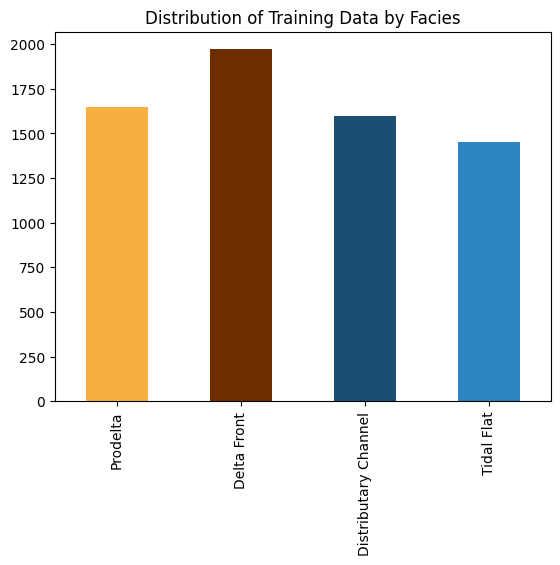

In [ ]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = df['ZONES_FIN'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

plt.figure()
facies_counts.plot(kind='bar',color=facies_colors,
                   title='Distribution of Training Data by Facies')
facies_counts

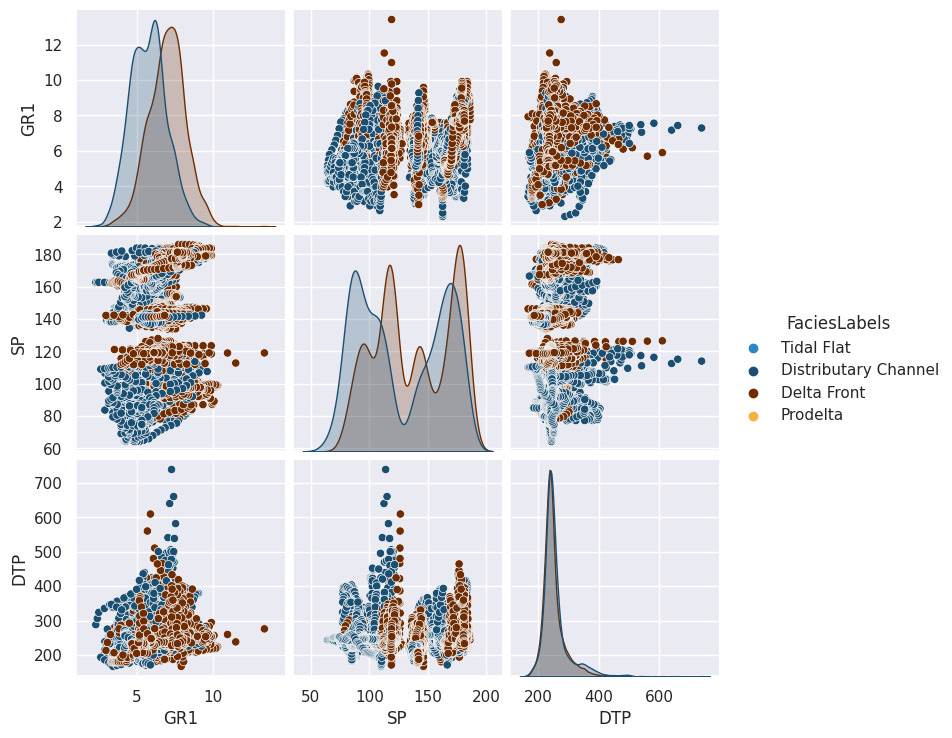

In [ ]:
#save plot display settings to change back to when done plotting with seaborn
inline_rc = dict(mpl.rcParams)

import seaborn as sns
sns.set()
sns.pairplot(df.drop(['Well','ZONES_FIN','DEPT'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)))

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)


In [ ]:
correct_facies_labels = df['ZONES_FIN'].values

feature_vectors = df.drop(['Well','ZONES_FIN','DEPT','FaciesLabels'], axis=1)
feature_vectors

,GR1,SP,DTP
0,6.76,116.44,274.54
1,6.81,115.91,270.73
2,6.86,115.38,266.92
3,6.91,114.34,265.65
4,6.89,113.29,264.38
...,...,...,...
9003,7.68,180.35,258.26
9004,7.86,180.64,249.12
9005,8.03,180.94,239.98
9006,7.86,181.12,236.42


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)
scaled_features

array([[ 0.30864818, -0.46172954,  0.52703434],
       [ 0.34614279, -0.47693911,  0.4358364 ],
       [ 0.38363741, -0.49214867,  0.34463846],
       ...,
       [ 1.26101144,  1.38924581, -0.30020996],
       [ 1.13352975,  1.39441132, -0.38542379],
       [ 0.99854913,  1.39928986, -0.47063761]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_facies_labels.astype(str), test_size=0.2, random_state=42)

#### Модель ExtraTreesClassifier


In [ ]:
clf_tree = ExtraTreesClassifier()

In [ ]:
clf_tree.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
y_pred = clf_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7408239700374532

In [ ]:
clf_tree.score(X_test, y_test)

0.7408239700374532

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.71      0.70      0.71       336
           3       0.73      0.77      0.75       410
           6       0.72      0.70      0.71       301
           7       0.82      0.78      0.80       288

    accuracy                           0.74      1335
   macro avg       0.74      0.74      0.74      1335
weighted avg       0.74      0.74      0.74      1335



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix(y_test, y_pred)

array([[235,  44,  46,  11],
       [ 37, 316,  28,  29],
       [ 42,  36, 212,  11],
       [ 15,  39,   8, 226]])

In [ ]:
# itertoools is a standard library for all kinds of handy iterator manipulation
import itertools
def conf_mat(y_test, y_pred):
  selected = np.unique(y_test)
  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_test, y_pred)

  title = 'Confusion matrix'
  cmap = plt.cm.Reds

  # Plot non-normalized confusion matrix
  plt.figure()
  plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(selected))
  plt.xticks(tick_marks, selected, rotation=45)
  plt.yticks(tick_marks, selected)

  # Print the support numbers inside the plot
  thresh = cnf_matrix.max() / 2.
  for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
      plt.text(j, i, format(cnf_matrix[i, j], 'd'),
              horizontalalignment="center",
              color="white" if cnf_matrix[i, j] > thresh else "black")

  plt.tight_layout()
  _ = plt.ylabel('True label')
  _ = plt.xlabel('Predicted label')

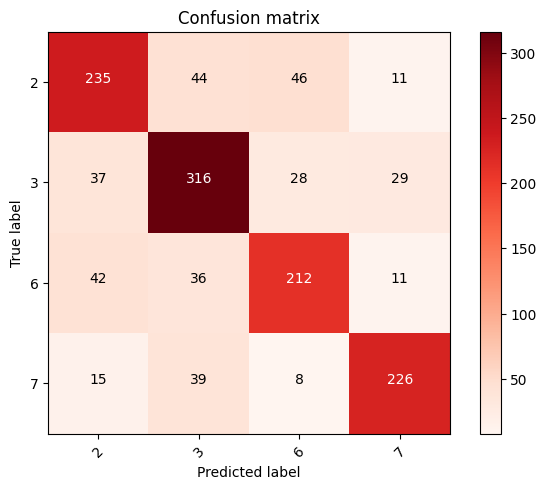

In [ ]:
conf_mat(y_test, y_pred)

In [ ]:
blind = pd.read_csv('/content/CSV/blind.csv')
blind['Well'] = blind['Well'].astype('category')
y_real = blind['ZONES_FIN'].values.astype(int)
y_real=y_real.astype(str)
val_feature = blind.drop(['Well', 'DEPT','ZONES_FIN'], axis=1)

In [ ]:
scaled_feature_val = scaler.transform(val_feature)

In [ ]:
y_pred = clf_tree.predict(val_feature)
blind['Facies'] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


In [ ]:
accuracy_score(y_real, y_pred)

0.21805955811719502

#### Training the SVM classifier

In [ ]:
from sklearn import svm

clf_SVC = svm.SVC()

In [ ]:
clf_SVC.fit(X_train,y_train)

SVC()

In [ ]:
predicted_labels = clf_SVC.predict(X_test)

In [ ]:
conf=confusion_matrix(y_test, predicted_labels)

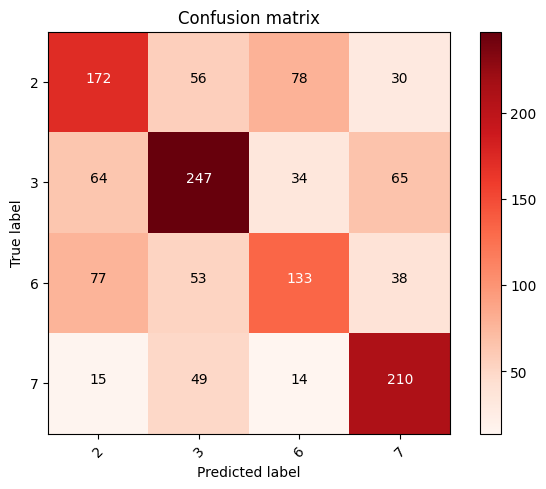

In [ ]:
conf_mat(y_test, predicted_labels)

In [ ]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

In [ ]:
print( 'Facies classification accuracy = %f' % accuracy(conf))

Facies classification accuracy = 0.570787


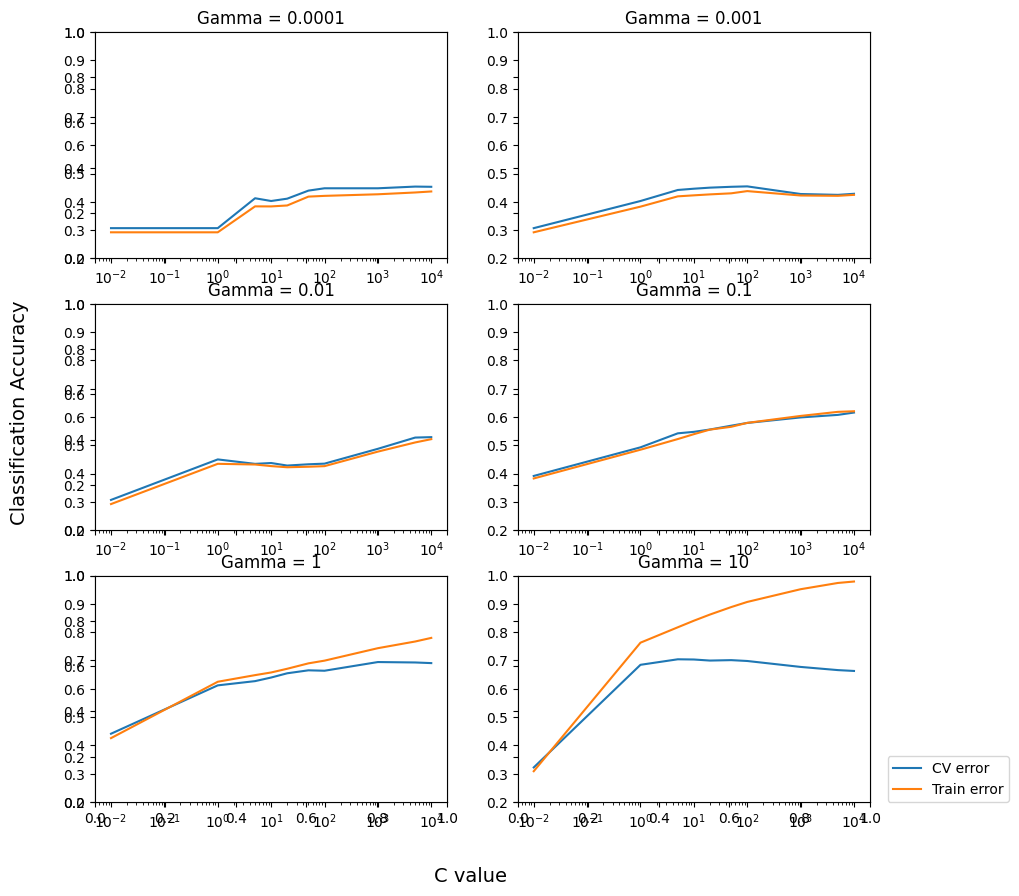

In [ ]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])

    fig, axes = plt.subplots(3, 2,
                        sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = plot_number / 2
        column = plot_number % 2
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):

            clf = svm.SVC(C = c_value, gamma = gamma_value)
            clf.fit(X_train,y_train)

            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))

            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
        #ax = axes[row, column]
        ax = fig.add_subplot(3, 2,plot_number+1 )
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])

    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)

    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
             rotation='vertical', fontsize=14)

In [ ]:
clf = svm.SVC(C = 10, gamma = 10)
clf.fit(X_train,y_train)

cv_conf = confusion_matrix(y_test, clf.predict(X_test))

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))

Optimized facies classification accuracy = 0.70


In [ ]:
blind = pd.read_csv('/content/CSV/blind.csv')
blind['Well'] = blind['Well'].astype('category')
y_real = blind['ZONES_FIN'].values.astype(int)
y_real=y_real.astype(str)
val_feature = blind.drop(['Well', 'DEPT','ZONES_FIN'], axis=1)


In [ ]:
scaled_feature_val = scaler.transform(val_feature)
scaled_feature_val

array([[ 1.71768333e+01,  5.65224843e+02, -1.71508500e-01],
       [ 1.64870071e+01,  5.61576921e+02, -1.72409246e-01],
       [ 1.57540667e+01,  5.57928999e+02, -1.73309992e-01],
       ...,
       [ 1.51935829e+01,  5.89438587e+02,  2.68325632e+00],
       [ 1.53229254e+01,  5.89755798e+02,  3.14263686e+00],
       [ 1.54953819e+01,  5.90020140e+02,  3.60201740e+00]])

In [ ]:
y_pred = clf.predict(scaled_feature_val)
blind['Facies'] = y_pred

In [ ]:
cv_conf = confusion_matrix(y_real, y_pred)

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))

Optimized facies classification accuracy = 0.13
